<a href="https://colab.research.google.com/github/ray17062000/project_machine_learning/blob/master/minor_project_banks_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [207]:
df = pd.read_csv("/content/bank_data_set.csv")

In [212]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [213]:
df1 = df.drop(columns = ['default','campaign','previous','poutcome','marital','deposit'])

df1

,age,job,education,balance,housing,loan,contact,day,month,duration,pdays
0,59,admin.,secondary,2343,yes,no,unknown,5,may,1042,-1
1,56,admin.,secondary,45,no,no,unknown,5,may,1467,-1
2,41,technician,secondary,1270,yes,no,unknown,5,may,1389,-1
3,55,services,secondary,2476,yes,no,unknown,5,may,579,-1
4,54,admin.,tertiary,184,no,no,unknown,5,may,673,-1
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,primary,1,yes,no,cellular,20,apr,257,-1
11158,39,services,secondary,733,no,no,unknown,16,jun,83,-1
11159,32,technician,secondary,29,no,no,cellular,19,aug,156,-1
11160,43,technician,secondary,0,no,yes,cellular,8,may,9,172


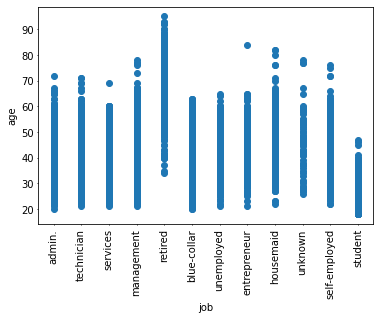

In [222]:
import matplotlib.pyplot as plt
plt.scatter(df['job'],df['age'])
plt.xticks(rotation = 90)
plt.tick_params(length = 1 )
plt.xlabel('job')
plt.ylabel('age')
plt.show()

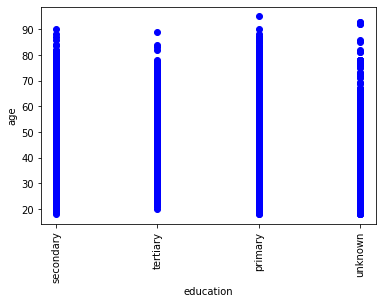

In [217]:
plt.scatter(df['education'],df['age'], color = 'b')
plt.xticks(rotation = 90)
plt.xlabel('education')
plt.ylabel('age')
plt.show()

In [ ]:
inputs = df.drop(columns = ['default','contact','campaign','previous','poutcome','age','deposit','marital','pdays'])
inputs

,job,education,balance,housing,loan,day,month,duration
0,admin.,secondary,2343,yes,no,5,may,1042
1,admin.,secondary,45,no,no,5,may,1467
2,technician,secondary,1270,yes,no,5,may,1389
3,services,secondary,2476,yes,no,5,may,579
4,admin.,tertiary,184,no,no,5,may,673
...,...,...,...,...,...,...,...,...
11157,blue-collar,primary,1,yes,no,20,apr,257
11158,services,secondary,733,no,no,16,jun,83
11159,technician,secondary,29,no,no,19,aug,156
11160,technician,secondary,0,no,yes,8,may,9


In [ ]:
target = df['age']
target

0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_job = LabelEncoder()
le_education = LabelEncoder()
le_housing = LabelEncoder()
le_loan = LabelEncoder()
le_month = LabelEncoder()
le_deposit = LabelEncoder()
le_marital = LabelEncoder()

In [ ]:
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['education_n'] = le_education.fit_transform(inputs['education'])
inputs['housing_n'] = le_housing.fit_transform(inputs['housing'])
inputs['loan_n'] = le_loan.fit_transform(inputs['loan'])
inputs['month_n'] = le_month.fit_transform(inputs['month'])
inputs['deposit_n'] = le_month.fit_transform(inputs['deposit'])
inputs['marital_n'] = le_month.fit_transform(inputs['marital'])

In [ ]:
inputs = inputs.drop(columns = ['job','education','housing','loan','month','deposit','marital','pdays'])
inputs

,balance,day,duration,job_n,education_n,housing_n,loan_n,month_n,deposit_n,marital_n
0,2343,5,1042,0,1,1,0,8,1,1
1,45,5,1467,0,1,0,0,8,1,1
2,1270,5,1389,9,1,1,0,8,1,1
3,2476,5,579,7,1,1,0,8,1,1
4,184,5,673,0,2,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...
11157,1,20,257,1,0,1,0,0,0,2
11158,733,16,83,7,1,0,0,6,0,1
11159,29,19,156,9,1,0,0,1,0,2
11160,0,8,9,9,1,0,1,8,0,1


In [ ]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   balance      11162 non-null  int64
 1   day          11162 non-null  int64
 2   duration     11162 non-null  int64
 3   job_n        11162 non-null  int64
 4   education_n  11162 non-null  int64
 5   housing_n    11162 non-null  int64
 6   loan_n       11162 non-null  int64
 7   month_n      11162 non-null  int64
 8   deposit_n    11162 non-null  int64
 9   marital_n    11162 non-null  int64
dtypes: int64(10)
memory usage: 872.2 KB


In [ ]:
from sklearn.model_selection import train_test_split
inputs_train,inputs_test,target_train,target_test = train_test_split(inputs,target, random_state = 0)

In [ ]:
print(inputs_train.shape)
print(inputs_test.shape)
print(target_train.shape)
print(target_test.shape)

(8371, 10)
(2791, 10)
(8371,)
(2791,)


In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

In [ ]:
model.fit(inputs_train,target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
model.score(inputs,target)*100


76.31248880129009